# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "FGOALS-s2"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-process/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.3183579444885254 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.5648720264434814 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.8278427124023438 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 1.0738279819488525 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 1.318988561630249 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20110101-20111231.nc
It takes elapsed_time 1.5420763492584229 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rc

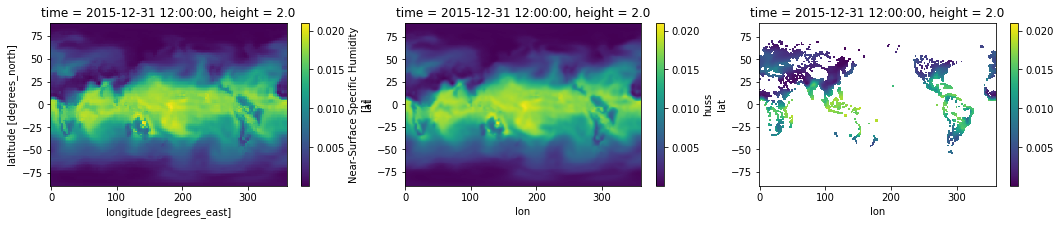

It takes elapsed_time 1.1679446697235107 to plot the layer
It takes elapsed_time 36.969335317611694 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.22094416618347168 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.4405679702758789 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.7055859565734863 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.9358029365539551 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 1.1695241928100586 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1

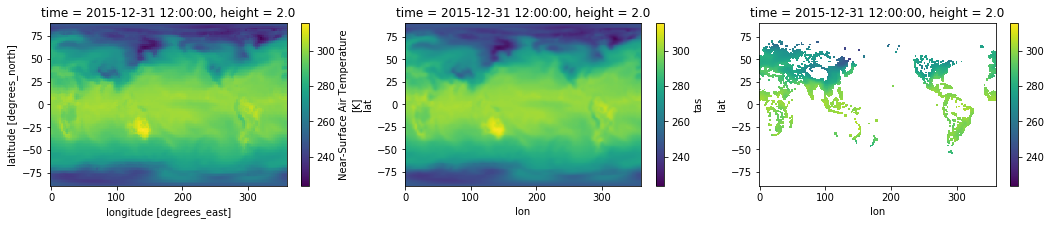

It takes elapsed_time 0.8298308849334717 to plot the layer
It takes elapsed_time 20.76210117340088 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.2569844722747803 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.4883584976196289 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.7605624198913574 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.9907925128936768 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 1.2154889106750488 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1

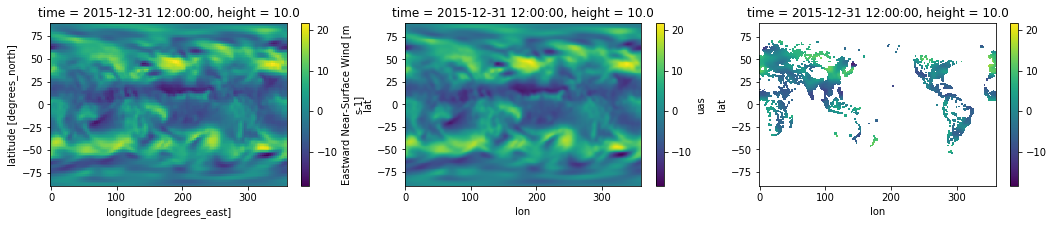

It takes elapsed_time 0.8435170650482178 to plot the layer
It takes elapsed_time 20.906968116760254 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.2524709701538086 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.4823188781738281 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.6980466842651367 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.9344732761383057 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 1.1860239505767822 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p

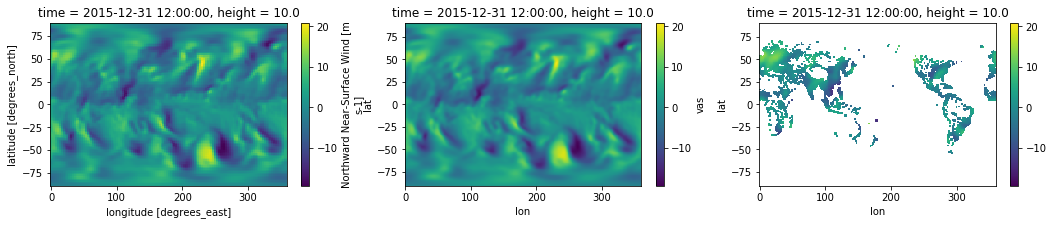

It takes elapsed_time 0.8467159271240234 to plot the layer
It takes elapsed_time 20.700233697891235 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.2612900733947754 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.4901716709136963 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.6876349449157715 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.8971741199493408 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 1.1110994815826416 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20110

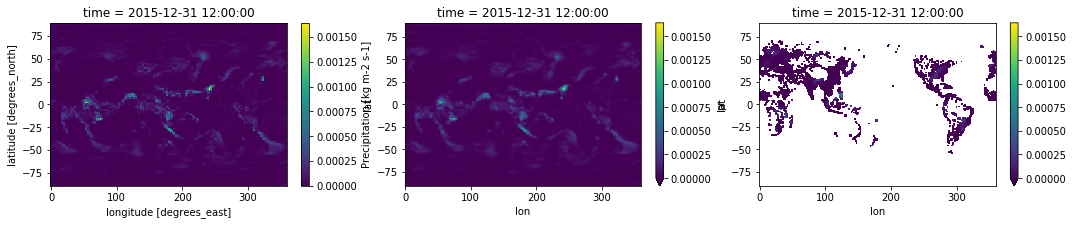

It takes elapsed_time 0.846435546875 to plot the layer
It takes elapsed_time 20.458860397338867 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.21915221214294434 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.46577000617980957 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.6991615295410156 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.9033510684967041 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 1.113671064376831 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i

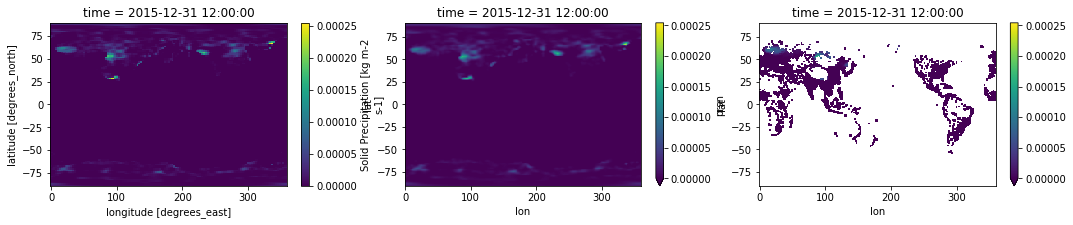

It takes elapsed_time 0.8190219402313232 to plot the layer
It takes elapsed_time 20.29906153678894 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.2511482238769531 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.4775979518890381 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.6882481575012207 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.8649778366088867 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 1.076366901397705 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlds_day_FGOALS-s2_rcp8

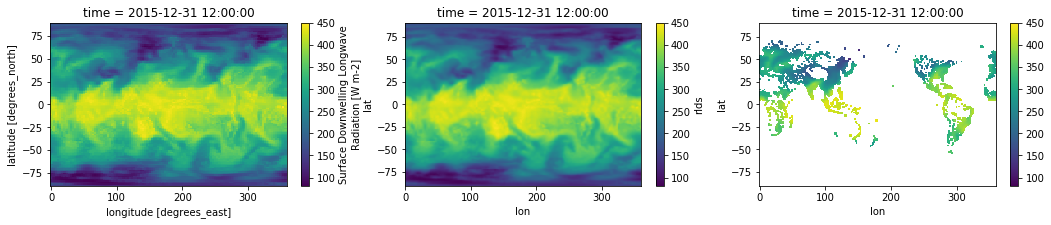

It takes elapsed_time 0.8753864765167236 to plot the layer
It takes elapsed_time 20.19233989715576 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.20584416389465332 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.4244546890258789 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.6356773376464844 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.8956685066223145 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 1.1083104610443115 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlus_day_FGOALS-s2_rc

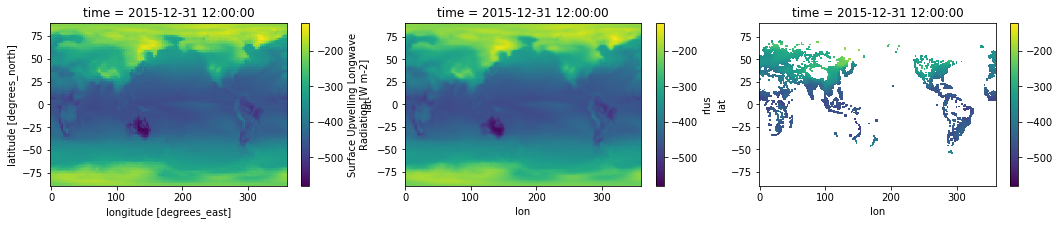

It takes elapsed_time 0.8182599544525146 to plot the layer
It takes elapsed_time 21.16214680671692 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.2613663673400879 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.47855663299560547 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.7151925563812256 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.9336540699005127 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 1.127899169921875 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsds_day_FGOALS-s2_rcp

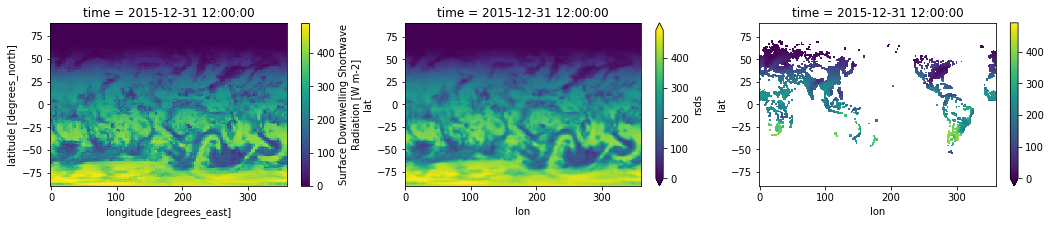

It takes elapsed_time 0.82358717918396 to plot the layer
It takes elapsed_time 20.276669025421143 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.24216818809509277 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.4222986698150635 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.595142126083374 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.8389935493469238 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 1.079803228378296 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsus_day_FGOALS-s2_rcp85

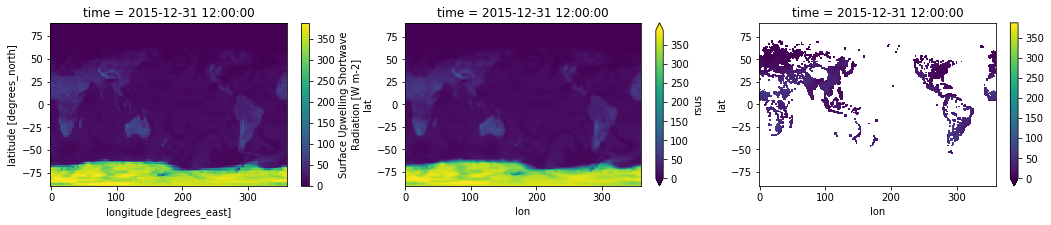

It takes elapsed_time 0.8379569053649902 to plot the layer
It takes elapsed_time 20.42271399497986 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2016, 1)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 31.745909690856934 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

249.08412194252014


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.25631189346313477 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.4868903160095215 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.7614834308624268 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.9991729259490967 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 1.2188608646392822 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20660101-20661231.nc
It takes elapsed_time 2.132781505584717 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/huss_day_FGOALS-s2_r

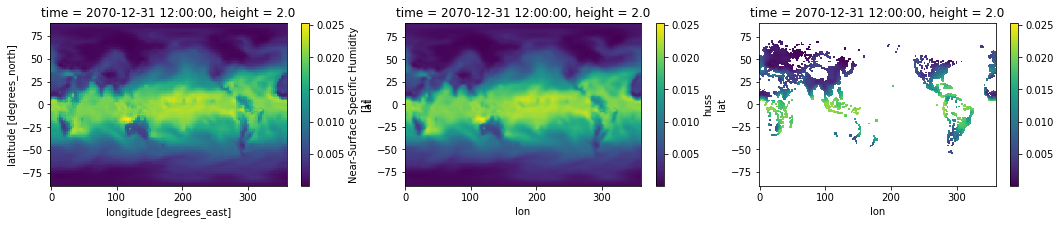

It takes elapsed_time 0.8288676738739014 to plot the layer
It takes elapsed_time 21.340662002563477 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.24607539176940918 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.49803972244262695 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.7423348426818848 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 1.0096800327301025 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 1.25917387008667 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i

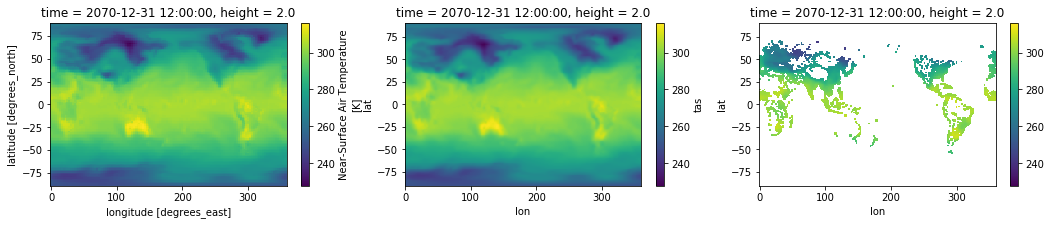

It takes elapsed_time 0.8138282299041748 to plot the layer
It takes elapsed_time 20.47055196762085 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.23734045028686523 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.4310426712036133 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.664940595626831 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.8891067504882812 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 1.13712739944458 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_2

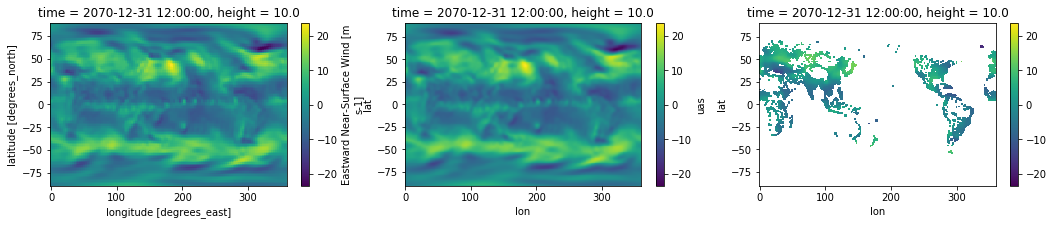

It takes elapsed_time 0.8318448066711426 to plot the layer
It takes elapsed_time 20.237864017486572 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.2748122215270996 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.5017862319946289 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.7011632919311523 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.9240760803222656 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 1.1688051223754883 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p

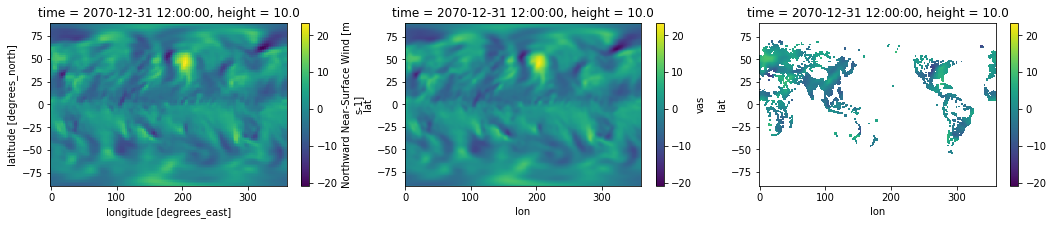

It takes elapsed_time 0.8424603939056396 to plot the layer
It takes elapsed_time 20.43641209602356 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.2760951519012451 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.5092480182647705 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.770634651184082 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 1.0153779983520508 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 1.25832200050354 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20660101-

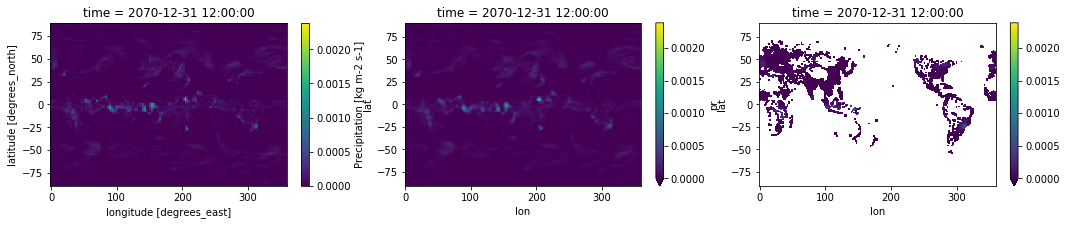

It takes elapsed_time 0.8031141757965088 to plot the layer
It takes elapsed_time 20.285484790802002 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.24062895774841309 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.4797689914703369 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.7038004398345947 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.9298617839813232 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 1.1556332111358643 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/prsn_day_FGOALS-s2_rcp85

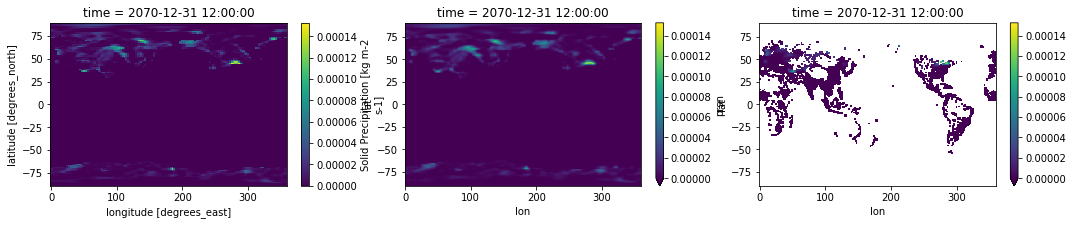

It takes elapsed_time 1.1111316680908203 to plot the layer
It takes elapsed_time 20.666496753692627 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.2345409393310547 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.48670291900634766 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.7478165626525879 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.9621262550354004 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 1.1880018711090088 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlds_day_FGOALS-s2_r

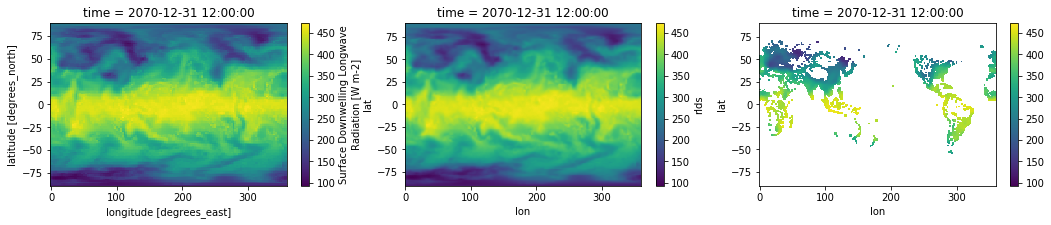

It takes elapsed_time 0.8618500232696533 to plot the layer
It takes elapsed_time 20.44982147216797 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.20231056213378906 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.4362833499908447 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.6795840263366699 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.8937485218048096 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 1.1264076232910156 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rlus_day_FGOALS-s2_rc

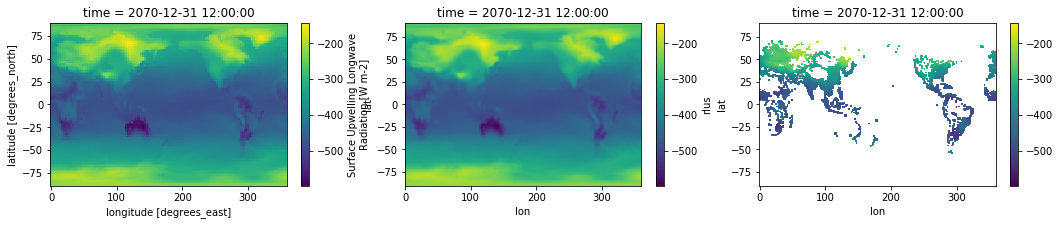

It takes elapsed_time 0.8143775463104248 to plot the layer
It takes elapsed_time 20.06991720199585 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.23484110832214355 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.4642932415008545 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.698488712310791 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.9117348194122314 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 1.160299301147461 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsds_day_FGOALS-s2_rcp8

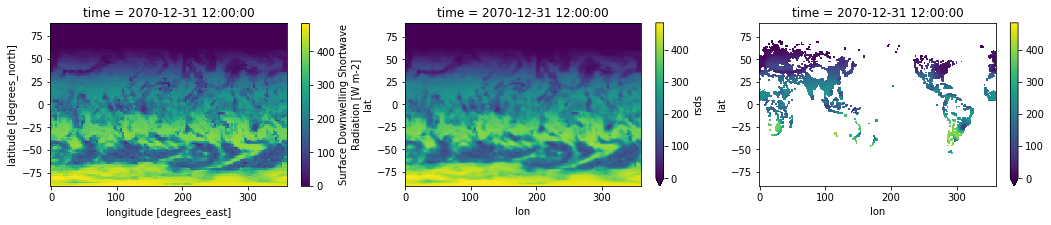

It takes elapsed_time 0.823908805847168 to plot the layer
It takes elapsed_time 20.12877130508423 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.21565651893615723 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.4584963321685791 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.6953387260437012 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.9129219055175781 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 1.1039526462554932 to load the data
/glade/scratch/zhonghua/CMIP5/FGOALS-s2/rsus_day_FGOALS-s2_rcp

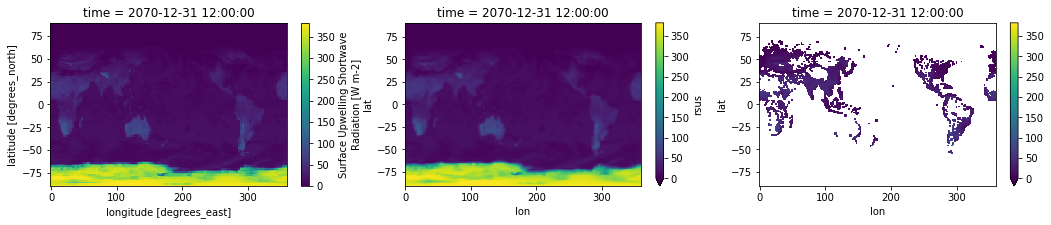

It takes elapsed_time 0.8336522579193115 to plot the layer
It takes elapsed_time 20.40990924835205 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2061, 2071, 1)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 29.780548334121704 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

248.98125314712524
